In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("sales_data_sample.csv",encoding="latin1") #Latin 1 is compulsary there is problem in dataset

In [4]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [7]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [8]:
data.shape

(2823, 25)

In [9]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [10]:
data = data[['QUANTITYORDERED','ORDERLINENUMBER']]
new_data = data.dropna(axis=0)

In [11]:
data 

,QUANTITYORDERED,ORDERLINENUMBER
0,30,2
1,34,5
2,41,2
3,45,6
4,49,14
...,...,...
2818,20,15
2819,29,1
2820,43,4
2821,34,1


<Axes: >

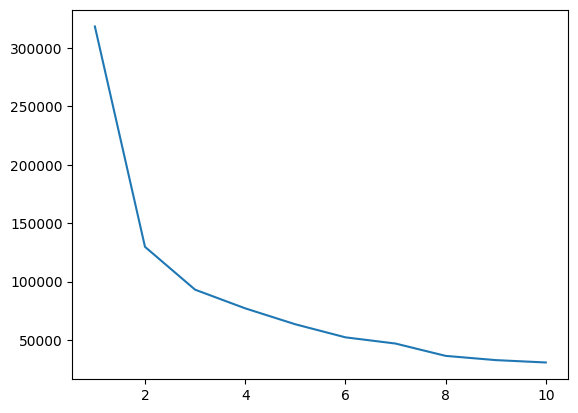

In [12]:
from  sklearn.cluster import KMeans
import seaborn as sns


wcss = []
for i in range(1,11):
    clustering = KMeans(n_clusters=i ,init="k-means++")
    clustering.fit(data)
    wcss.append(clustering.inertia_)

ks = [1,2,3,4,5,6,7,8,9,10]
sns.lineplot(x=ks, y=wcss)

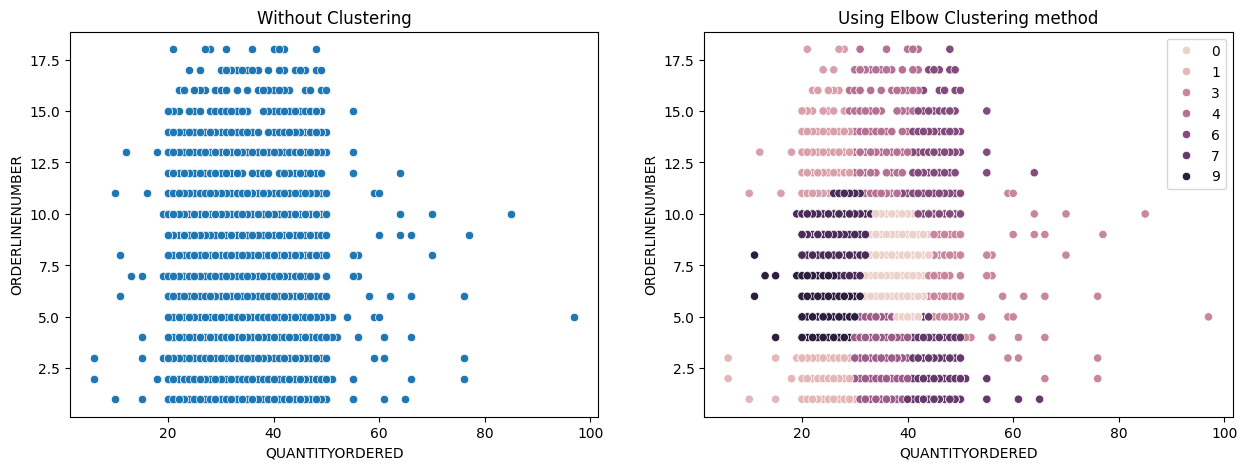

In [20]:
import matplotlib.pyplot as plt

# Sample data and plot setup
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.scatterplot(ax=axes[0], data=new_data, x='QUANTITYORDERED', y='ORDERLINENUMBER').set_title("Without Clustering")
sns.scatterplot(ax=axes[1], data=new_data, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=clustering.labels_).set_title("Using Elbow Clustering method")

plt.show()

In [15]:
new_data.describe()

,QUANTITYORDERED,ORDERLINENUMBER
count,2823.000000,2823.000000
mean,35.092809,6.466171
std,9.741443,4.225841
min,6.000000,1.000000
25%,27.000000,3.000000
50%,35.000000,6.000000
75%,43.000000,9.000000
max,97.000000,18.000000


In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = ss.fit_transform(new_data)

<Axes: >

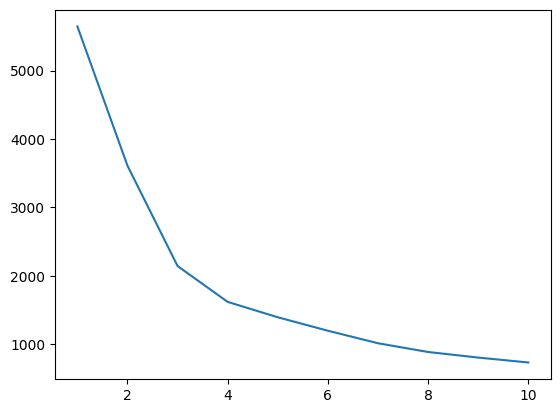

In [25]:
wcss_sc = []
for i in range(1,11):
    clustering_sc = KMeans(n_clusters=i ,init="k-means++")
    clustering_sc.fit(scaled)
    wcss_sc.append(clustering_sc.inertia_)

ks = [1,2,3,4,5,6,7,8,9,10]
sns.lineplot(x=ks, y=wcss_sc)

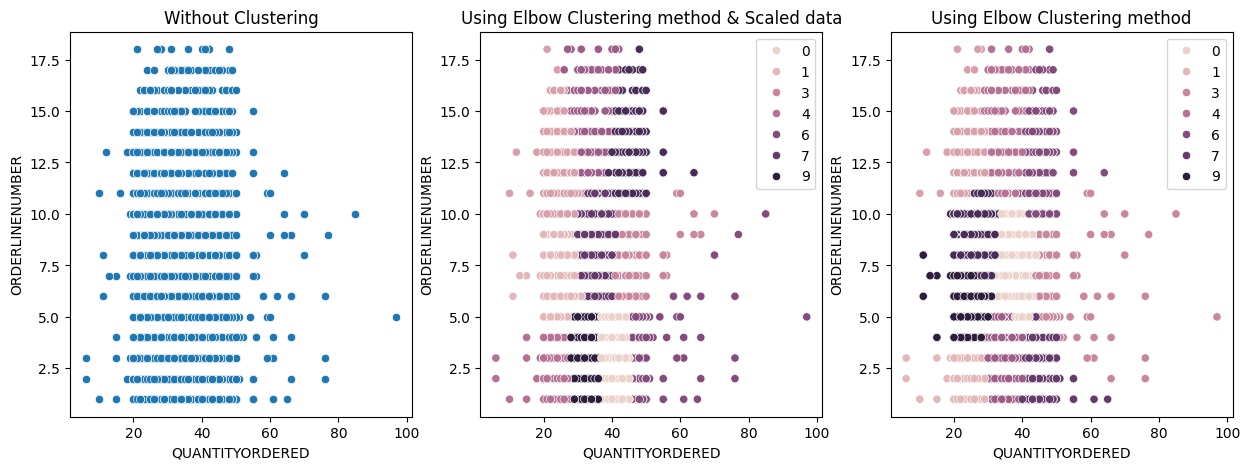

In [26]:
# Sample data and plot setup
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.scatterplot(ax=axes[0], data=new_data, x='QUANTITYORDERED', y='ORDERLINENUMBER').set_title("Without Clustering")
sns.scatterplot(ax=axes[2], data=new_data, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=clustering.labels_).set_title("Using Elbow Clustering method")
sns.scatterplot(ax=axes[1], data=new_data, x='QUANTITYORDERED', y='ORDERLINENUMBER', hue=clustering_sc.labels_).set_title("Using Elbow Clustering method & Scaled data")
plt.show()